## OpenLIT Integration via OpenTelemetry

Langfuse is an [OpenTelemetry](https://langfuse.com/integrations/native/opentelemetry) backend, allowing trace ingestion from various OpenTelemetry instrumentation libraries. 

### Step 1: Install Dependencies

In [1]:
%pip install openai langfuse openlit --upgrade

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/946.9 kB ? eta -:--:--
     --------------------- ---------------- 524.3/946.9 kB 3.4 MB/s eta 0:00:01
     ---------------------------------------- 946.9/946.9 kB 4.4 MB/s  0:00:00
INFO: pip is looking at multiple versions of opentelemetry-instrumentation-aiohttp-client to determine which version is compatible with other requirements. This could take a while.
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/d0/6f/f20cd1542959f43fb26a5bf9bb18cd81a1ea0700e8870c8f369bd07f5c65/opentelemetry_instrumentation-0.57b0-py3-none-any.whl (32 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/26/aa/2328f27200b8e51640d4d7ff5343ba6a81ab7d2650a9f574db016aae4adf/opentelemetry_instrumentation-0.56b0-py3-none-any.whl (31 kB)
INFO: pip is looking at multiple versions of opentelemetry-instrumentation-asgi to determine which version is compatible with other requirements. This c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crewai 0.157.0 requires litellm==1.74.9, but you have litellm 1.76.1 which is incompatible.
deepeval 3.2.5 requires click<8.2.0,>=8.0.0, but you have click 8.2.1 which is incompatible.
deepeval 3.2.5 requires tenacity<=9.0.0, but you have tenacity 9.1.2 which is incompatible.
langfuse-haystack 2.2.0 requires langfuse<3.0.0,>=2.9.0, but you have langfuse 3.3.4 which is incompatible.


### Step 2: Configure Environment Variables

In [1]:
import os
import base64


# Get keys for your project from the project settings page: https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = "pk-lf-962190cc-b2bd-47c0-b752-8de287a2a5c1"
os.environ["LANGFUSE_SECRET_KEY"] = "sk-lf-4e9959c3-0935-4142-b789-734beb81d15a"
os.environ["LANGFUSE_HOST"] = "http://localhost:3000"

# Your openai key
# os.environ["OPEN_AI_URL"] = "https://open.bigmodel.cn/api/paas/v4/"
os.environ["OPENAI_API_KEY"] = "f0c1fb9f5c534e55a66d9e539916fdb0.GQKa6HaX6MpT9ioJ"
os.environ["OPENAI_BASE_URL"] = "https://open.bigmodel.cn/api/paas/v4"

In [2]:
from langfuse import get_client
 
langfuse = get_client()
 
# Verify connection
if langfuse.auth_check():
    print("Langfuse client is authenticated and ready!")
else:
    print("Authentication failed. Please check your credentials and host.")

Langfuse client is authenticated and ready!


#### Step 3: Initialize Instrumentation

With the environment set up, import the needed libraries and initialize OpenLIT instrumentation. We set tracer=tracer to use the tracer we created in the previous step.

In [3]:
import openlit
 
# Initialize OpenLIT instrumentation. The disable_batch flag is set to true to process traces immediately.
openlit.init(disable_batch=True)

Overriding of current TracerProvider is not allowed
Unexpected error occurred while fetching pricing info: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /openlit/openlit/main/assets/pricing.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000191384F52B0>: Failed to resolve 'raw.githubusercontent.com' ([Errno 11004] getaddrinfo failed)"))
Overriding of current MeterProvider is not allowed
Overriding of current TracerProvider is not allowed
Overriding of current TracerProvider is not allowed


### Step 4: Make a Chat Completion Request

In [6]:
from openai import OpenAI
 
# Create an instance of the OpenAI client.
openai_client = OpenAI()
 
# Make a sample chat completion request. This request will be traced by OpenLIT and sent to Langfuse.
chat_completion = openai_client.chat.completions.create(
    messages=[
        {
          "role": "user",
          "content": "What is LLM Observability?",
        }
    ],
    model="glm-4.5-flash",
)
 
print(chat_completion)

{
    "name": "POST",
    "context": {
        "trace_id": "0x212843110c9fa5bb32ee77648936316a",
        "span_id": "0xf01c91db8947f73a",
        "trace_state": "[]"
    },
    "kind": "SpanKind.CLIENT",
    "parent_id": "0x2904dbd0f54c6534",
    "start_time": "2025-09-15T01:34:06.758940Z",
    "end_time": "2025-09-15T01:35:41.625044Z",
    "status": {
        "status_code": "UNSET"
    },
    "attributes": {
        "http.method": "POST",
        "http.url": "https://open.bigmodel.cn/api/paas/v4/chat/completions",
        "http.status_code": 200
    },
    "events": [],
    "links": [],
    "resource": {
        "attributes": {
            "telemetry.sdk.language": "python",
            "telemetry.sdk.name": "opentelemetry",
            "telemetry.sdk.version": "1.34.1",
            "service.name": "unknown_service"
        },
        "schema_url": ""
    }
}
{
    "name": "chat glm-4.5-flash",
    "context": {
        "trace_id": "0x212843110c9fa5bb32ee77648936316a",
        "span_id

[Trace](http://localhost:3000/project/cmcoo14lx0006ph077uy36drf/traces/212843110c9fa5bb32ee77648936316a?timestamp=2025-09-15T01%3A34%3A06.756Z&display=details)



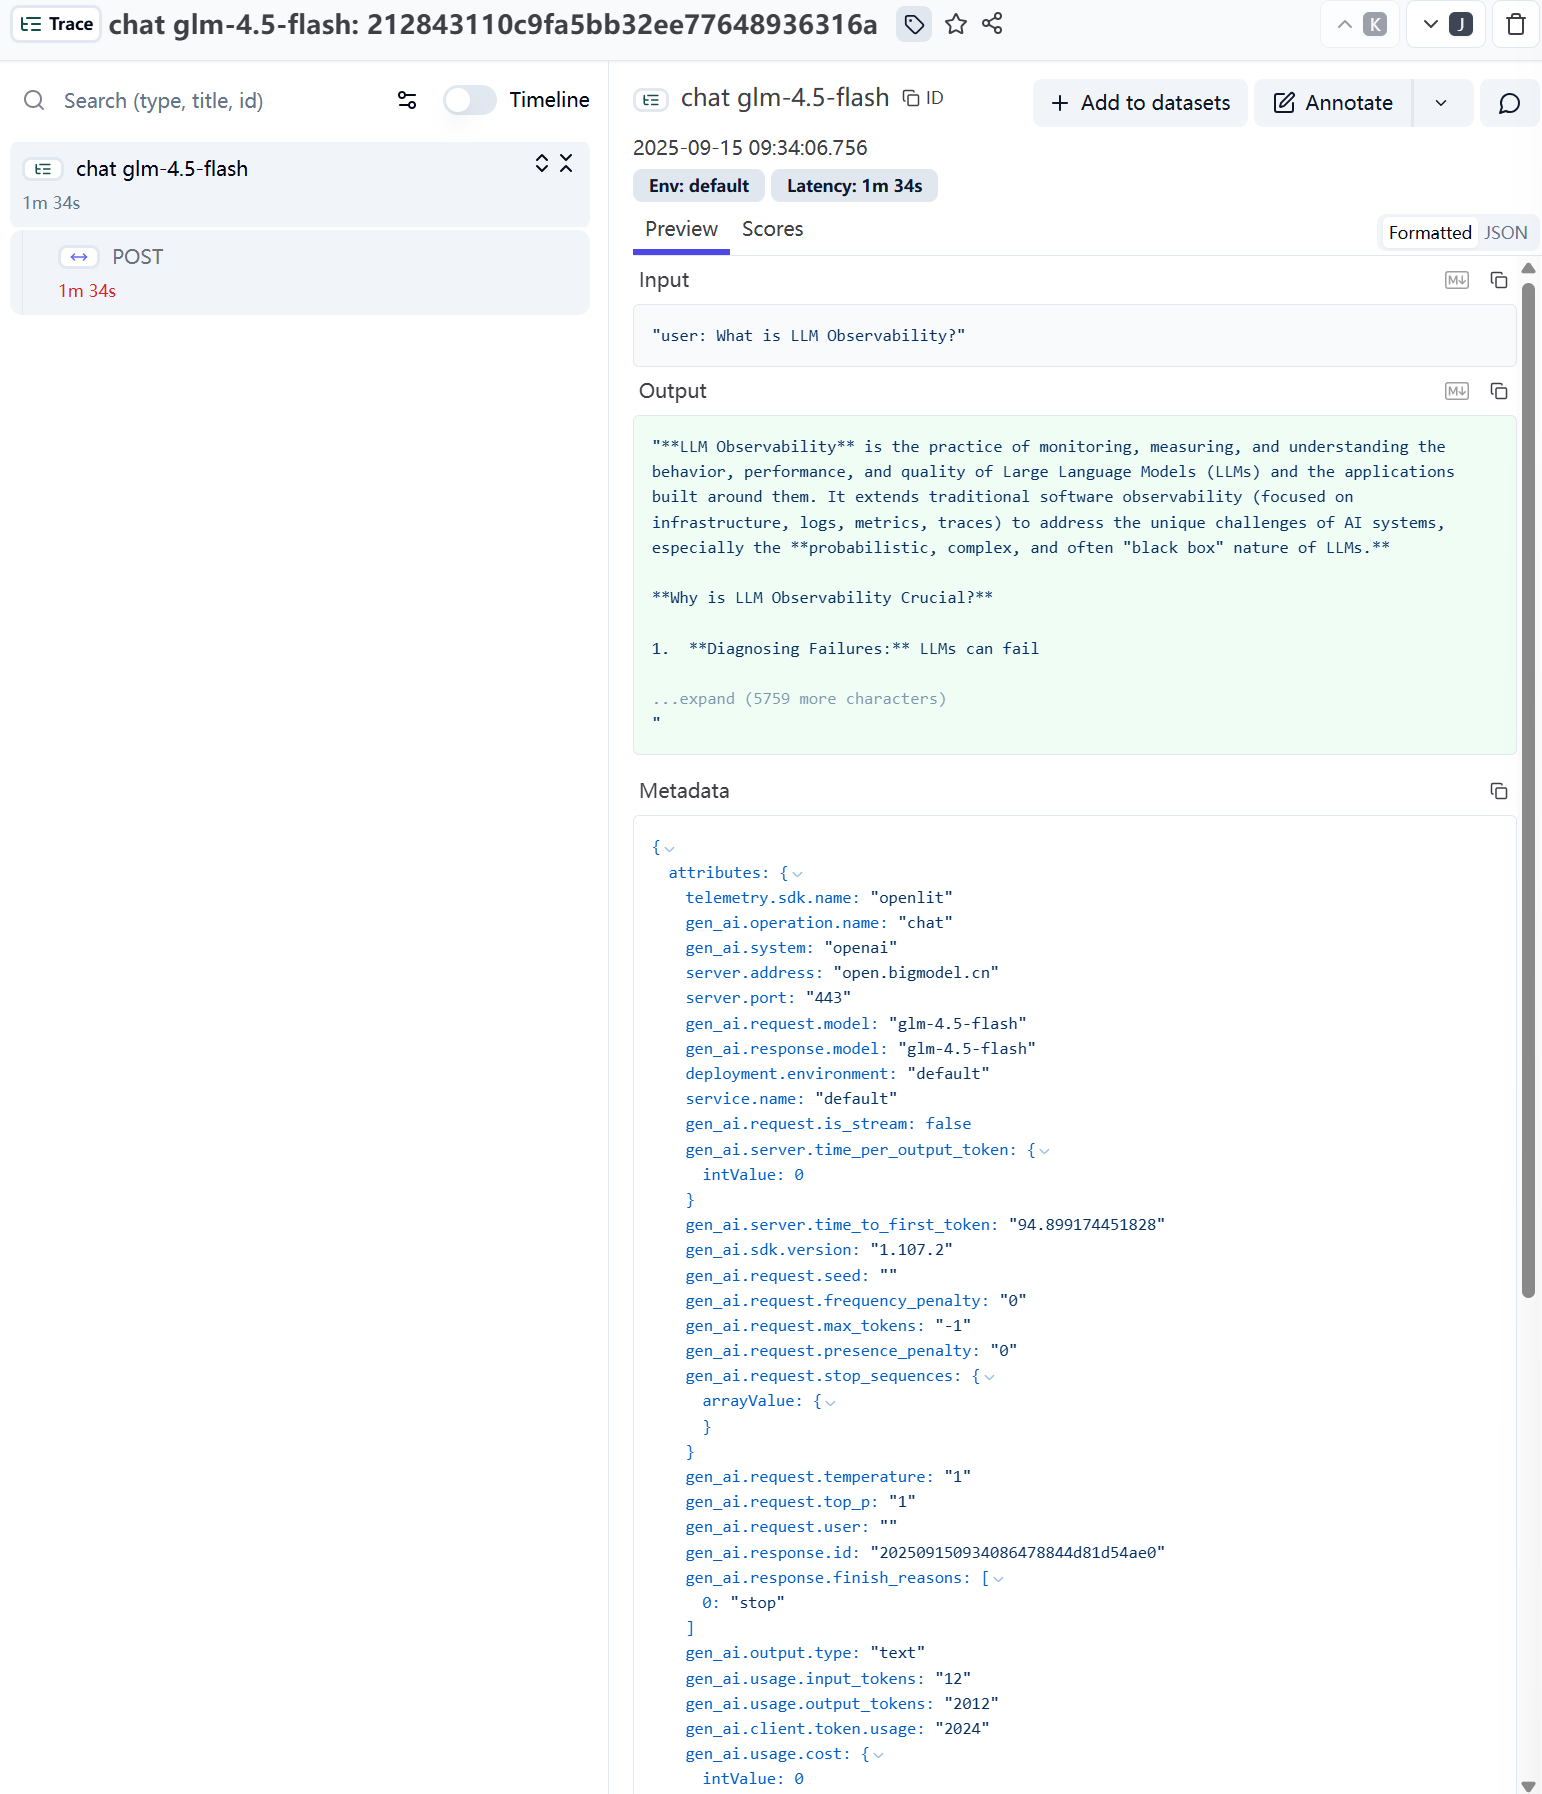

### Using Dataset Experiments with the OpenLit Instrumentation

With Dataset Experiments, you can test your application on a dataset before deploying it to production.

In [ ]:
from opentelemetry.trace import format_trace_id

 
def otel_helper_function(input):
    with tracer.start_as_current_span("Otel-Trace") as span:
 
        # Your gen ai application logic here: (make sure this function is sending traces to Langfuse)
        response = OpenAI().chat.completions.create(
            messages=[{"role": "user", "content": input}],
            model="gpt-4o-mini",
        )
        print(response.choices[0].message.content)
 
        # Fetch the current span and trace id
        current_span = trace.get_current_span()
        span_context = current_span.get_span_context()
        trace_id = span_context.trace_id
        formatted_trace_id = format_trace_id(trace_id)
 
        langfuse_trace = langfuse.trace(
            id=formatted_trace_id, 
            input=input, 
            output=response.choices[0].message.content
        )
    return langfuse_trace, response.choices[0].message.content

In [ ]:
from langfuse import Langfuse
langfuse = Langfuse()

dataset = langfuse.get_dataset("<langfuse_dataset_name>")

# Run our application against each dataset item
for item in dataset.items:
    langfuse_trace, output = otel_helper_function(item.input["text"])

    # Link the trace to the dataset item for analysis
    item.link(
        langfuse_trace,
        run_name="run-01",
        run_metadata={ "model": "glm-4.5-flash" }
    )

    # Optionally, store a quick evaluation score for demonstration
    langfuse_trace.score(
        name="<example_eval>",
        value= your_evaluation_function(output),
        comment="This is a comment"
    )

# Flush data to ensure all telemetry is sent
langfuse.flush()